In [ ]:
## 사이킷런에서 데이터 로드

from sklearn.datasets import load_iris
a = load_iris()
a['data']

In [2]:
data = []

for line in open("iris.data", "r"):
  try :
    items = line.strip().split(",")
    data.append(([float(i) for i in items[:4]], items[4]))
  except :
    pass
data[0]

([5.1, 3.5, 1.4, 0.2], 'Iris-setosa')

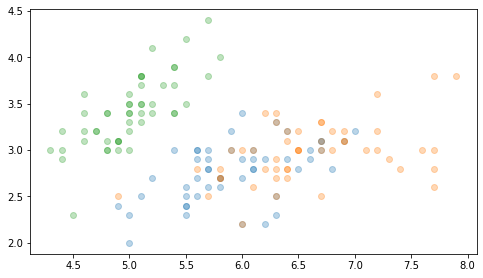

In [26]:
import matplotlib.pyplot as plt
classes = ['Iris-versicolor', 'Iris-virginica','Iris-setosa']


x0 = []
x1 = []
plt.figure(figsize=(8,4.5))

for c in classes :
  x0 = []
  x1 = []
  for d in data:
    if d[1] == c:
      x0.append(d[0][0])
      x1.append(d[0][1])
  plt.scatter(x0,x1, alpha=0.3)


plt.show()


In [4]:
import random

random.shuffle(data)
train = data[:-30]
test = data[-30:]
test

[([6.3, 3.3, 6.0, 2.5], 'Iris-virginica'),
 ([6.5, 3.0, 5.8, 2.2], 'Iris-virginica'),
 ([5.1, 2.5, 3.0, 1.1], 'Iris-versicolor'),
 ([4.8, 3.4, 1.9, 0.2], 'Iris-setosa'),
 ([5.7, 4.4, 1.5, 0.4], 'Iris-setosa'),
 ([6.1, 2.6, 5.6, 1.4], 'Iris-virginica'),
 ([5.1, 3.8, 1.9, 0.4], 'Iris-setosa'),
 ([5.0, 3.2, 1.2, 0.2], 'Iris-setosa'),
 ([5.7, 3.8, 1.7, 0.3], 'Iris-setosa'),
 ([6.5, 2.8, 4.6, 1.5], 'Iris-versicolor'),
 ([6.4, 2.8, 5.6, 2.2], 'Iris-virginica'),
 ([5.9, 3.2, 4.8, 1.8], 'Iris-versicolor'),
 ([5.6, 2.8, 4.9, 2.0], 'Iris-virginica'),
 ([6.6, 3.0, 4.4, 1.4], 'Iris-versicolor'),
 ([5.7, 2.8, 4.5, 1.3], 'Iris-versicolor'),
 ([6.0, 2.9, 4.5, 1.5], 'Iris-versicolor'),
 ([6.7, 3.3, 5.7, 2.5], 'Iris-virginica'),
 ([5.6, 2.5, 3.9, 1.1], 'Iris-versicolor'),
 ([4.9, 3.1, 1.5, 0.1], 'Iris-setosa'),
 ([7.6, 3.0, 6.6, 2.1], 'Iris-virginica'),
 ([7.2, 3.6, 6.1, 2.5], 'Iris-virginica'),
 ([6.9, 3.1, 4.9, 1.5], 'Iris-versicolor'),
 ([6.7, 3.0, 5.0, 1.7], 'Iris-versicolor'),
 ([6.3, 2.8, 5.1, 1.

In [5]:
## euclidean distance between a, b

def distance(a,b) :
  s = 0
  for ai,bi in zip(a,b):
    s += (bi-ai)**2
  return s ** 0.5

  # 한줄로 표현
  # return sum((bi-ai)**2 for ai,bi in zip(a,b))**0.5)

In [45]:
from collections import Counter

"""
  query : 찾고자 하는 점
  k : 몇개를 찾을 것인가
  train : 어디서 찾을 것인가

"""

def knn(query,k, train) : 
  # train 데이터 중에서 query랑 가장 가까운 k개 찾기
  dist_cls = []
  for v ,c in train:
    dist = distance(query, v)
    dist_cls.append((dist, c))
  
  dist_cls.sort()
  dist_cls = dist_cls[:k]

  # 가중치 주기
  # 가중치를 주어야 더 안정적이다.
  cls_cnt = {}
  for d, c in dist_cls:
    if c not in cls_cnt :
      cls_cnt[c] = 0
    cls_cnt[c] += 1 # 1/(1+d)
  
  return max(cls_cnt.items(), key = lambda cc : cc[1])[0]

  # 찾은 것 중에서 가장 많이 나온 class return
  # cls_cnt = Counter([c for d, c in dist_cls])
  # return cls_cnt.most_common(1)[0][0]


100%|██████████| 30/30 [00:19<00:00,  1.52it/s]


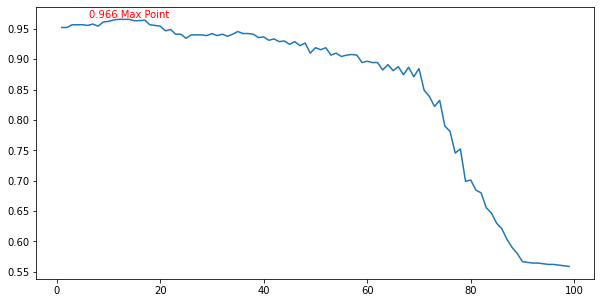

In [46]:
from tqdm import tqdm

n_trials = 30
acc_avg = [0] * 100
for _ in tqdm(range(n_trials)):
  random.shuffle(data)
  train = data[:-30]
  test = data[-30:]

  for k in range(1,100): 
    correct_cnt = 0
    for t_vec, t_cls in test :
      expected = knn(t_vec, k , train)
      if expected == t_cls:
        correct_cnt += 1
      
    accuracy = correct_cnt / len(test)
    acc_avg[k] += accuracy
  
acc_avg = [a/n_trials for a in acc_avg]

acc_avg = acc_avg[1:]
X = range(1,100)

  # X.append(k)
  # Y.append(accuracy)
  #accuracy


plt.figure(figsize=(10,5))
plt.plot(X, acc_avg)

dic = dict(zip(acc_avg, X))
# 가장 높은 정확도 
plt.text(dic[max(dic)],max(dic),
         str(round(max(dic),3)) + ' Max Point',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom')

plt.show()

# query = test[0][0]
# ans = knn(query, 5, train)
# ans
# test[0][1]